In [30]:
import pickle
import glob
from tqdm.auto import tqdm
import re

data = []
for pickle_fp in tqdm(glob.glob("experimental_data/*.p")[:4000]):
    # num = re.search('experimental_data/(\number).p', pickle_fp).group(0)
    with open(pickle_fp, 'rb') as file:
        data_dict = pickle.load(file)
        save_dict = {}
        for key in data_dict.keys():
            if "score" in key:
                save_dict[key] = data_dict[key]
        data.append(save_dict)

100%|███████████████████████████████████████████████████| 4000/4000 [00:38<00:00, 103.66it/s]


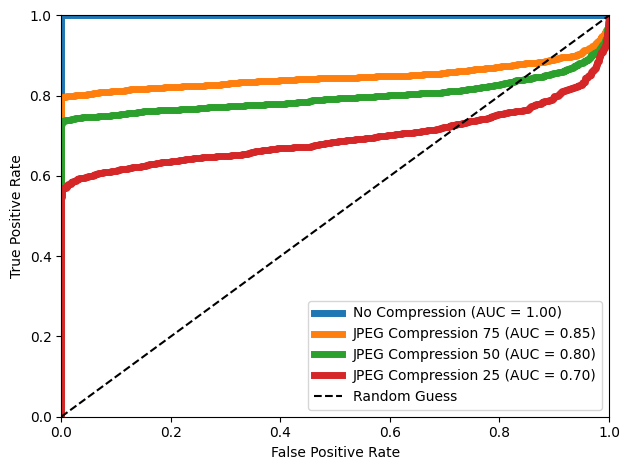

In [33]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

compression_levels = [100, 75, 50, 25]
random = np.random.RandomState(1234)

for compression_level in compression_levels:
    y_true = []
    pred = []

    key = "watermarked_image_detection_score" if compression_level == 100 else f"watermarked_compressed_{compression_level}_detection_score"
    label = "No Compression" if compression_level == 100 else f"JPEG Compression {compression_level}"
    
    for i, i_data in enumerate(data):
        if random.randint(0, 2, size=1)[0]:
            y_true += [1]
            pred += [
                i_data[key].statistic,
            ]
        else:
            y_true += [0]
            pred += [
                i_data["clean_image_detection_score"].statistic,
            ]

    fpr, tpr, thresholds = metrics.roc_curve(
        y_true, 
        pred, 
        pos_label=1
    )
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr,tpr,label=f"{label} (AUC = {roc_auc:.2f})", linewidth=5)
plt.axline((0, 0), slope=1, label="Random Guess", color="black", linestyle='dashed')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.savefig("plots/jpeg_compression_figure.png")

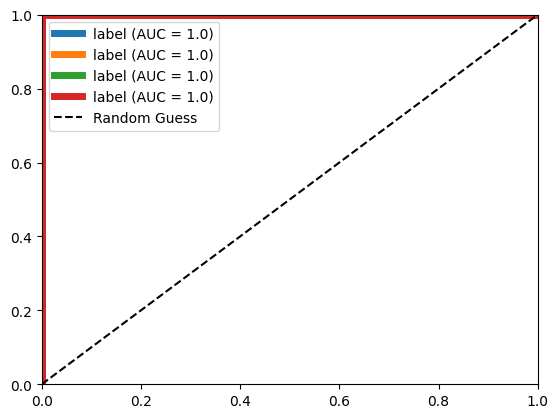

In [25]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

rotation_degrees = [0, 90, 180, 270]
random = np.random.RandomState(1234)

for rotation_degree in rotation_degrees:
    y_true = []
    pred = []

    key = "watermarked_image_detection_score" if rotation_degree == 0 else f"watermarked_rotated{rotation_degree}_detection_score"
    label = "No Rotation" if rotation_degree == 0 else f"Rotated {rotation_degree}"
    
    for i, i_data in enumerate(data):
        if random.randint(0, 2, size=1)[0]:
            y_true += [1]
            pred += [
                i_data[key].statistic,
            ]
        else:
            y_true += [0]
            pred += [
                i_data["clean_image_detection_score"].statistic,
            ]

    fpr, tpr, thresholds = metrics.roc_curve(
        y_true, 
        pred, 
        pos_label=1
    )
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr,tpr,label=f"label (AUC = {roc_auc})", linewidth=5)
plt.axline((0, 0), slope=1, label="Random Guess", color="black", linestyle='dashed')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.legend()
plt.show()